In [4]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AB_US_2020.csv')

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [6]:
# Data check and clean-up
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
id                                226030 non-null int64
name                              226002 non-null object
host_id                           226030 non-null int64
host_name                         225997 non-null object
neighbourhood_group               110185 non-null object
neighbourhood                     226030 non-null object
latitude                          226030 non-null float64
longitude                         226030 non-null float64
room_type                         226030 non-null object
price                             226030 non-null int64
minimum_nights                    226030 non-null int64
number_of_reviews                 226030 non-null int64
last_review                       177428 non-null object
reviews_per_month                 177428 non-null float64
calculated_host_listings_count    226030 non-null int64
availability_365                  226

In [8]:
df.isna().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [10]:
# remove rows with null values

df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85144 entries, 48150 to 212164
Data columns (total 17 columns):
id                                85144 non-null int64
name                              85144 non-null object
host_id                           85144 non-null int64
host_name                         85144 non-null object
neighbourhood_group               85144 non-null object
neighbourhood                     85144 non-null object
latitude                          85144 non-null float64
longitude                         85144 non-null float64
room_type                         85144 non-null object
price                             85144 non-null int64
minimum_nights                    85144 non-null int64
number_of_reviews                 85144 non-null int64
last_review                       85144 non-null object
reviews_per_month                 85144 non-null float64
calculated_host_listings_count    85144 non-null int64
availability_365                  85144 non-null 

In [11]:
df1.name = df1.name.astype(str)
df1.name=df1.name.str.lower()
df1.name=df1.name.replace(['-','@','$','&','!'],'',regex=True)

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


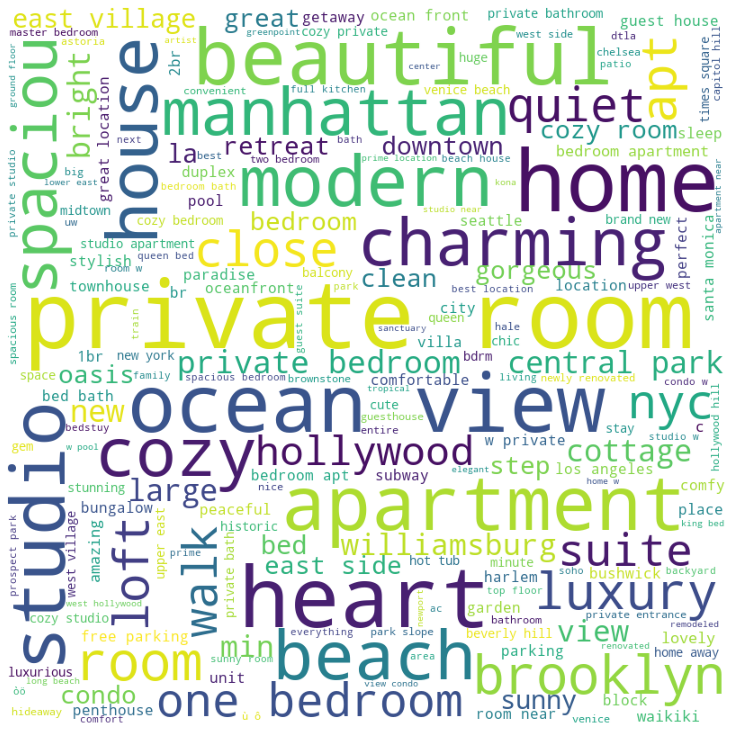

In [17]:
# replacing special characters

from wordcloud import WordCloud,STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in df1.name:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                     background_color='white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [16]:
import sys
print(sys.executable)

/opt/anaconda3/envs/U4-S1-NLP/bin/python


In [19]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markmorelos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# load stop words for exclusion

import nltk
nltk.download('punkt')

df1["unigrams"] = df1["name"].apply(nltk.word_tokenize)
df1["unigrams"] =df1["unigrams"].apply(lambda x: [item for item in x if item not in stop_words])

result =  pd.Series(np.concatenate([x for x in df1.unigrams])).value_counts()
result = pd.DataFrame({'ngrams':list(result.keys()),
                      'count':list(result[:])})
result = result[result.ngrams != '.']
result = result.head(20)
result1 = result['ngrams'][1:20]
result1 # top 20 words in Name

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/markmorelos/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1          room
2       private
3       bedroom
4     apartment
5        studio
6         beach
7          cozy
9          home
10            2
11            1
12          apt
13     spacious
14         near
15        house
16         view
17        ocean
18    beautiful
19       modern
20        condo
Name: ngrams, dtype: object

In [22]:
# Processing Data

def inner(text):
    for word in text.split(' '):
        for c in result1:
            if word==c:
                return c
    return 'Null'
c1 = []
for text in df1['name']:
    c1.append(inner(text))
df1['Name'] = c1
df1.info()

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85144 entries, 48150 to 212164
Data columns (total 19 columns):
id                                85144 non-null int64
name                              85144 non-null object
host_id                           85144 non-null int64
host_name                         85144 non-null object
neighbourhood_group               85144 non-null object
neighbourhood                     85144 non-null object
latitude                          85144 non-null float64
longitude                         85144 non-null float64
room_type                         85144 non-null object
price                             85144 non-null int64
minimum_nights                    85144 non-null int64
number_of_reviews                 85144 non-null int64
last_review                       85144 non-null object
reviews_per_month                 85144 non-null float64
calculated_host_listings_count    85144 non-null int64
availability_365                  85144 non-null 

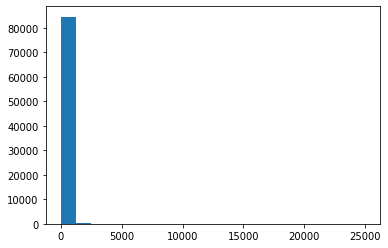

In [24]:
df2 = df1[['Name', 'neighbourhood_group', 'room_type', 'city', 'price']]

plt.hist(df2['price'], bins=20)
plt.show()

In [25]:
# case with prices < $1000

df2 = df2[(df2['price']<1000)]

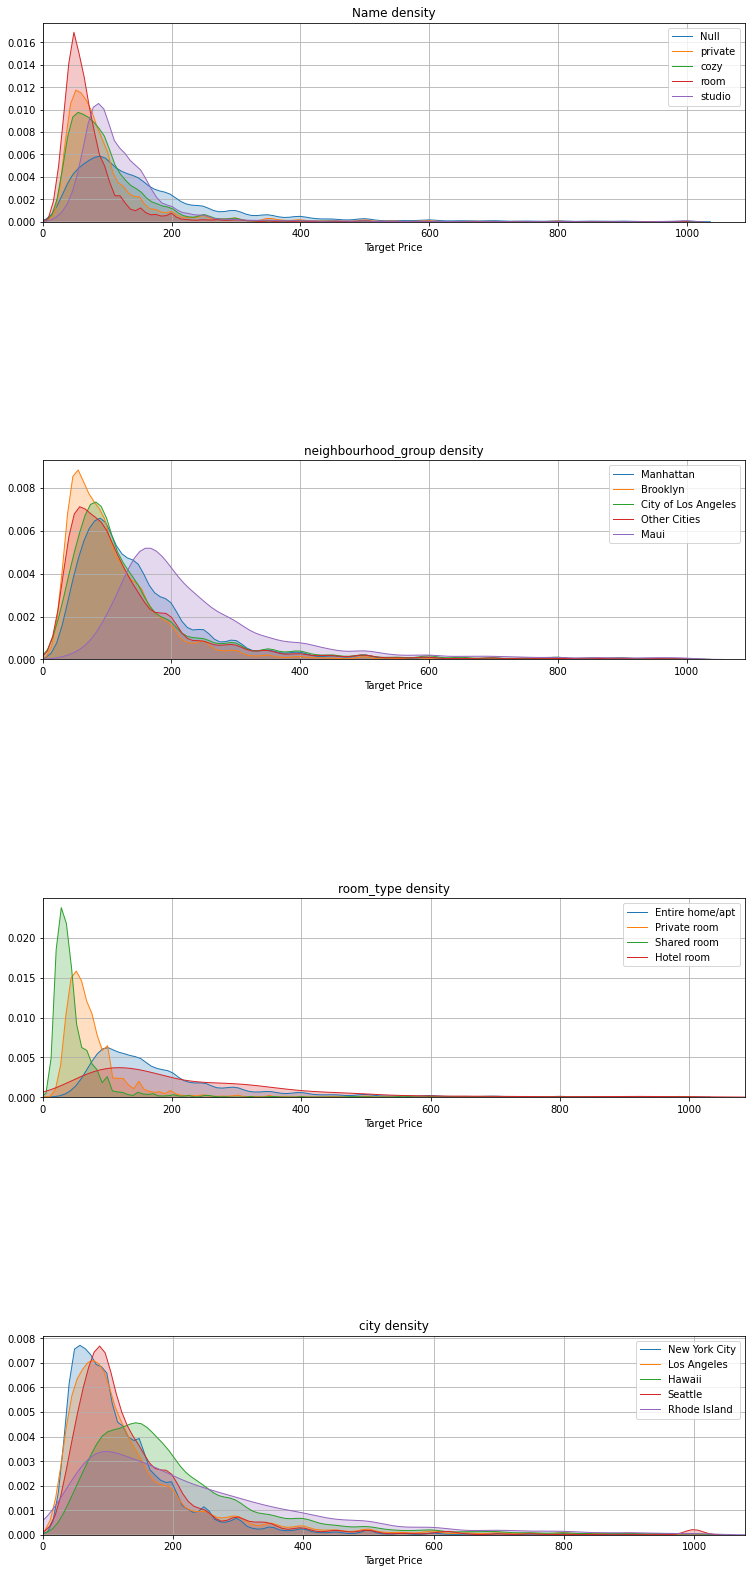

In [28]:
names = list(df2.columns)
fig, axs = plt.subplots(4, 1, figsize=(15, 15))
plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1.5,
                   wspace = 0.2, hspace = 1.2)

for column_name in names[:-1]:
    ax = axs[names.index(column_name)]
    cd = df2[column_name].value_counts()[:5]
    cd1 = pd.DataFrame({'label': list(cd.keys()),
                       'count': list(cd[:])})
    s = cd1['label']
    
    for s1 in s:
        # airline subset
        subset = df2[df2[column_name] == s1]
        
        # density plot
        sns.distplot(subset['price'], hist = False, kde = True,
                    kde_kws = {'shade': True, 'linewidth': 1}, ax=ax,
                    label = s1).set(xlim=(0))
        ax.set_xlabel('Target Price')
        ax.set_title(column_name + ' density')
        ax.grid('on')
        